In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warning (from sklearn and seaborn)



In [164]:
train = pd.read_csv('train.csv')

In [165]:
test = pd.read_csv('test.csv')

In [166]:
train.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [167]:
train.isna().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                 187
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  1
cabin               712
embarked              1
MedBoat             589
Survived              0
dtype: int64

In [168]:
test.isna().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                  76
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  0
cabin               302
embarked              1
MedBoat             234
dtype: int64

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.2+ KB


In [170]:
mean_age = train.age.mean()

In [171]:
mean_age

29.102309053497944

In [172]:
train.age = train.age.fillna(mean_age)

In [173]:
mean_age = test.age.mean()
test.age = test.age.fillna(mean_age)

In [174]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

to_train = ['fare', 'Siblings_spouses', 'Parchil', 'Survived']
fare_df = train[to_train]

#Split dataset with missing values and no missing values as test and train set respectively
x_train = fare_df[fare_df['fare'].notnull()].drop(columns='fare')
y_train = fare_df[fare_df['fare'].notnull()]['fare']
x_test = fare_df[fare_df['fare'].isnull()].drop(columns = 'fare')

#Fit a simple linear model to the dataset
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

#print fill values
print(np.round(pred, 5))

#Perform filling
train['fare'][train['fare'].isnull()] = pred

[17.33154]


In [175]:
train.embarked = train.embarked.fillna('S')
test.embarked = test.embarked.fillna('S')

In [176]:
train['MedBoat'].value_counts()

13       30
15       25
4        22
C        22
10       21
11       20
5        20
3        18
14       17
9        16
D        16
16       14
7        13
8        13
6        12
2        12
12       11
A         9
B         6
1         5
13 15     2
15 16     1
5 7       1
8 10      1
Name: MedBoat, dtype: int64

In [177]:
train['cabin'].fillna('B57 B59 B63 B66', inplace = True)
# train["cabin"].fillna( method ='ffill', inplace = True)
# train['cabin'].fillna(method = 'bfill', inplace = True)

In [178]:
test['cabin'].fillna('C7', inplace = True)
# test["cabin"].fillna( method ='ffill', inplace = True)
# test['cabin'].fillna(method = 'bfill', inplace = True)

In [179]:
test["MedBoat"].fillna( '14', inplace = True)
train["MedBoat"].fillna( '13', inplace = True)
# train["MedBoat"].fillna( method ='ffill', inplace = True)
# train['MedBoat'].fillna(method = 'bfill', inplace = True)

# test["MedBoat"].fillna( method ='ffill', inplace = True)
# test['MedBoat'].fillna(method = 'bfill', inplace = True)

In [180]:
train.head().transpose()

,0,1,2,3,4
traveller_ID,1214,677,534,1174,864
ticket_class,3,3,2,3,3
name,"Smiljanic, Mr. Mile","Bostandyeff, Mr. Guentcho","Phillips, Miss. Kate Florence (""Mrs Kate Louis...","Sage, Miss. Dorothy Edith ""Dolly""","Henriksson, Miss. Jenny Lovisa"
sex,male,male,female,female,female
age,29.1023,26,19,29.1023,28
Siblings_spouses,0,0,0,8,0
Parchil,0,0,0,2,0
TickNum,315037,349224,250655,CA. 2343,347086
fare,8.6625,7.8958,26,69.55,7.775
cabin,B57 B59 B63 B66,B57 B59 B63 B66,B57 B59 B63 B66,B57 B59 B63 B66,B57 B59 B63 B66


In [181]:
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    print('Num of classes in {}'.format(col))
    print(train[col].nunique())
    print('-----')

Num of classes in name
915
-----
Num of classes in sex
2
-----
Num of classes in TickNum
694
-----
Num of classes in cabin
146
-----
Num of classes in embarked
3
-----
Num of classes in MedBoat
24
-----


In [182]:
cols = ['TickNum']
train = train.drop(cols, axis = 1)
test = test.drop(cols, axis = 1)

In [183]:
combine = [train,test]
for data in combine:
    data['title']=data['name'].str.extract(' ([A-Za-z]+)\.',expand=False)
    data=data.drop('name',axis = 1, inplace=True)

In [184]:
modtrain = {'Major':'official', 'Don': 'official','Countess':'official','Master':'Master','Dr':'official','Rev':'official',
           'Col':'official', 'Sir':'official', 'Jonkheer':'official','Lady':'official','Ms':'Miss','Mlle':'Miss',
           'Mme':'Mrs','Mr':'Mr','Mrs':'Mrs','Miss':'Miss'}

In [185]:
train.title= train.title.map(modtrain)

In [186]:
modtest = {'Major':'official','Master':'Master','Rev':'official',
           'Col':'official', 'Capt':'official','Dona':'official','Mlle':'Miss',
           'Mr':'Mr','Mrs':'Mrs','Miss':'Miss'}
test.title = test.title.map(modtest)

In [187]:
dummies = []
cols = ['ticket_class','sex','embarked']
for col in cols:
     dummies.append(pd.get_dummies(train[col]))
        
titanic_dummies = pd.concat(dummies, axis=1)

train = train.drop(['ticket_class','sex','embarked'],axis=1)


In [188]:
train = pd.concat((train,titanic_dummies),axis=1)

In [189]:
dummies = []
cols = ['ticket_class','sex','embarked']
for col in cols:
     dummies.append(pd.get_dummies(test[col]))
        
titanic_dummies = pd.concat(dummies, axis=1)

test = test.drop(['ticket_class','sex','embarked'],axis=1)
test = pd.concat((test,titanic_dummies),axis=1)

In [190]:
cols = ['traveller_ID' ]
train = train.drop(cols, axis = 1)
test = test.drop(cols, axis = 1)

In [191]:
train.head().transpose()

,0,1,2,3,4
age,29.1023,26,19,29.1023,28
Siblings_spouses,0,0,0,8,0
Parchil,0,0,0,2,0
fare,8.6625,7.8958,26,69.55,7.775
cabin,B57 B59 B63 B66,B57 B59 B63 B66,B57 B59 B63 B66,B57 B59 B63 B66,B57 B59 B63 B66
MedBoat,13,13,11,13,13
Survived,0,0,1,0,0
title,Mr,Mr,Miss,Miss,Miss
1,0,0,0,0,0
2,0,0,1,0,0


In [192]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['cabin','MedBoat', 'title']

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    


In [193]:
for col in cat_cols:
    test[col] = le.fit_transform(test[col])

In [194]:
X = train.drop('Survived',axis=1)
y = train['Survived'].values

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [196]:
from sklearn.ensemble import RandomForestClassifier

imp = RandomForestClassifier(n_estimators= 10000, random_state = 42, n_jobs = -1)
imp.fit(X_train,y_train)
imp.score(X_test,y_test)

0.9381818181818182

In [199]:
X

,age,Siblings_spouses,Parchil,fare,cabin,MedBoat,title,1,2,3,female,male,C,Q,S
0,29.102309,0,0,8.6625,35,4,2,0,0,1,0,1,0,0,1
1,26.000000,0,0,7.8958,35,4,2,0,0,1,0,1,0,0,1
2,19.000000,0,0,26.0000,35,2,1,0,1,0,1,0,0,0,1
3,29.102309,8,2,69.5500,35,4,1,0,0,1,1,0,0,0,1
4,28.000000,0,0,7.7750,35,4,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,29.102309,0,0,7.6292,35,4,1,0,0,1,1,0,0,1,0
912,18.000000,0,0,7.7750,35,4,1,0,0,1,1,0,0,0,1
913,28.500000,0,0,16.1000,35,4,2,0,0,1,0,1,0,0,1
914,26.000000,0,0,7.9250,35,4,1,0,0,1,1,0,0,0,1


In [200]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [201]:
X=sc.fit_transform(X_train)
y=sc.transform(test)
y=pd.DataFrame(test , columns=X_train.columns)
X=pd.DataFrame(X_train, columns=X_train.columns)

In [202]:
y_pred = imp.predict(X_test)

In [203]:
from sklearn.metrics import f1_score, accuracy_score

In [204]:
f1_score(y_test, y_pred)

0.9090909090909091

In [209]:
sample = pd.read_csv('sample_submission.csv')

In [211]:
submit=sample.copy()

In [217]:
submit['Survived']=imp.predict(y)

Amount of People that did not Survive: 222
Amount of People that did not Survive: 171


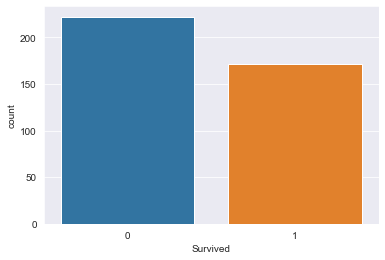

In [221]:
print('Amount of People that did not Survive:',submit.Survived.value_counts()[0])
print('Amount of People that did not Survive:',submit.Survived.value_counts()[1])
sns.countplot(submit.Survived);

In [223]:
submit.to_csv('Submission_titanic.csv',index=False)

In [98]:
len(y_pred)

275